In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-08-06 06:13:14--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  49.4MB/s    in 2.9s    

2020-08-06 06:13:18 (49.4 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [ ]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [ ]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [ ]:
train_horse_name = os.listdir(train_horse_dir)

train_human_name = os.listdir(train_human_dir)

print('Horses',train_horse_name[:10])
print('Humans',train_human_name[:10])

Horses ['horse31-2.png', 'horse01-1.png', 'horse27-4.png', 'horse27-5.png', 'horse07-0.png', 'horse36-9.png', 'horse31-6.png', 'horse36-0.png', 'horse46-3.png', 'horse02-6.png']
Humans ['human05-17.png', 'human05-05.png', 'human13-16.png', 'human01-06.png', 'human02-22.png', 'human02-19.png', 'human17-26.png', 'human17-03.png', 'human06-02.png', 'human14-00.png']


In [ ]:
print('total horses', len(train_horse_name))
print('total humans', len(train_human_name))

total horses 500
total humans 527


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

n_rows = 4
n_cols = 4
pic_index = 0

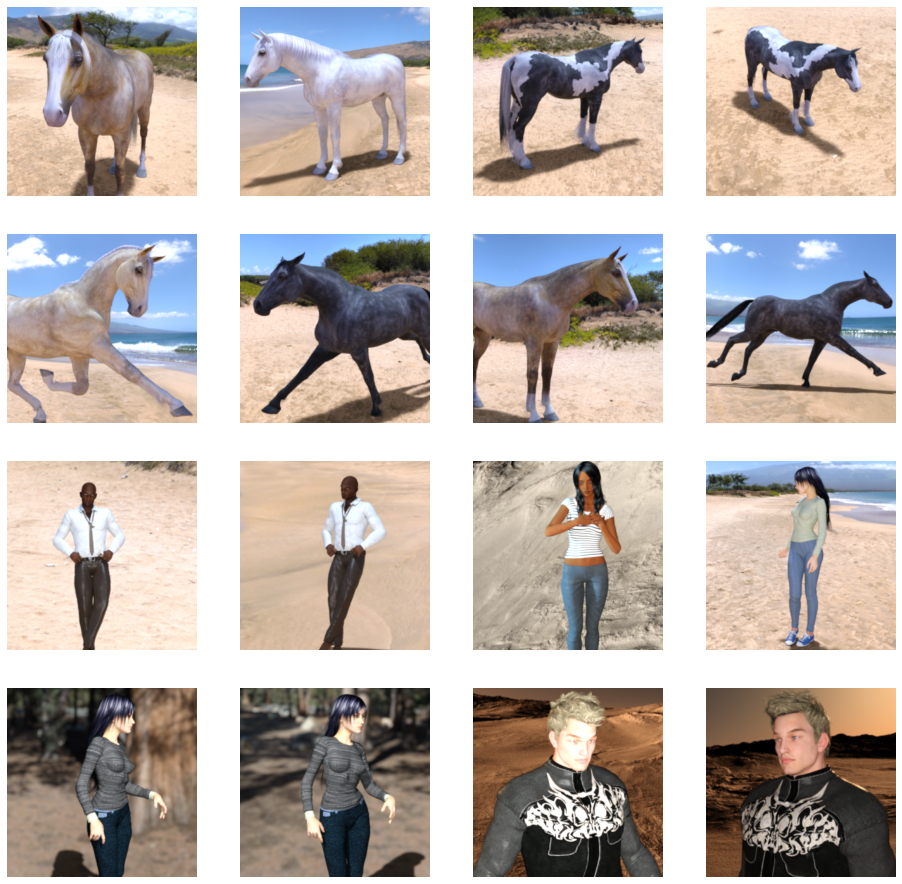

In [ ]:
fig = plt.gcf()
fig.set_size_inches(n_cols * 4, n_rows * 4)
pic_index += 8
next_horse_pic = [os.path.join(train_horse_dir, fname) for fname in train_horse_name [pic_index-8:pic_index]]
next_human_pic = [os.path.join(train_human_dir, fname) for fname in train_human_name [pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pic+next_human_pic):
  sp = plt.subplot(n_rows, n_cols, i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPool2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/tmp/horse-or-human/', tarmget_size=(300,300), batch_size=128, class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, steps_per_epoch=8, epochs=15, verbose=2)

Epoch 1/15
8/8 - 63s - loss: 0.9386 - accuracy: 0.5328
Epoch 2/15
8/8 - 62s - loss: 0.6783 - accuracy: 0.6518
Epoch 3/15
8/8 - 62s - loss: 0.6048 - accuracy: 0.8309
Epoch 4/15
8/8 - 63s - loss: 0.7252 - accuracy: 0.7775
Epoch 5/15
8/8 - 76s - loss: 0.4075 - accuracy: 0.8554
Epoch 6/15
8/8 - 73s - loss: 0.2269 - accuracy: 0.9110
Epoch 7/15
8/8 - 72s - loss: 0.2243 - accuracy: 0.9111
Epoch 8/15
8/8 - 63s - loss: 0.1503 - accuracy: 0.9466
Epoch 9/15
8/8 - 62s - loss: 0.1641 - accuracy: 0.9488
Epoch 10/15
8/8 - 63s - loss: 0.2938 - accuracy: 0.8765
Epoch 11/15
8/8 - 62s - loss: 0.1075 - accuracy: 0.9588
Epoch 12/15
8/8 - 63s - loss: 0.0741 - accuracy: 0.9800
Epoch 13/15
8/8 - 76s - loss: 0.7645 - accuracy: 0.8710
Epoch 14/15
8/8 - 63s - loss: 0.0612 - accuracy: 0.9833
Epoch 15/15
8/8 - 62s - loss: 0.0120 - accuracy: 0.9989


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/'+fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  if (classes[0] > 0.5):
    print(fn,"is a human")
  else:
    print(fn,'is a horse')